# Conectando ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo Dataset

In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/SI/ANN/heart_failure_clinical_records.csv')
X = dataset.iloc[:, 0:13]
Y = dataset.iloc[:, 12]


In [4]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [5]:
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: DEATH_EVENT, dtype: int64

# Criando datasets de treino e testes

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Importando o Keras

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Criando o modelo ANN

Epoch 1/20
268/268 [==============================] - 4s 10ms/step - loss: 0.7094 - accuracy: 0.5532 - val_loss: 0.5928 - val_accuracy: 0.7532
Epoch 2/20
268/268 [==============================] - 1s 4ms/step - loss: 0.5262 - accuracy: 0.7723 - val_loss: 0.4783 - val_accuracy: 0.8024
Epoch 3/20
268/268 [==============================] - 1s 4ms/step - loss: 0.4273 - accuracy: 0.8365 - val_loss: 0.3830 - val_accuracy: 0.8698
Epoch 4/20
268/268 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.9078 - val_loss: 0.2947 - val_accuracy: 0.9304
Epoch 5/20
268/268 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.9511 - val_loss: 0.2187 - val_accuracy: 0.9546
Epoch 6/20
268/268 [==============================] - 1s 3ms/step - loss: 0.1835 - accuracy: 0.9638 - val_loss: 0.1541 - val_accuracy: 0.9682
Epoch 7/20
268/268 [==============================] - 1s 3ms/step - loss: 0.1262 - accuracy: 0.9720 - val_loss: 0.1053 - val_accuracy: 0.9788
Epoch

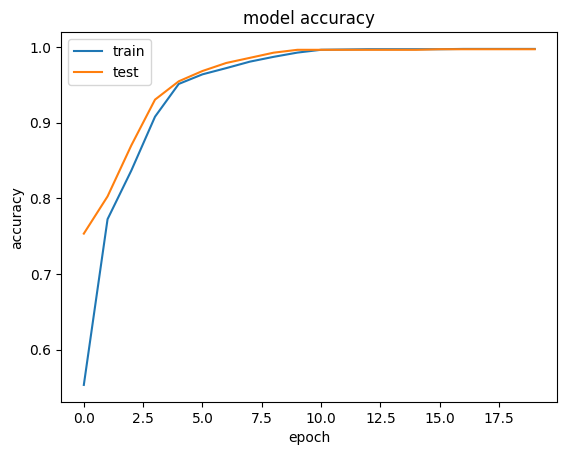

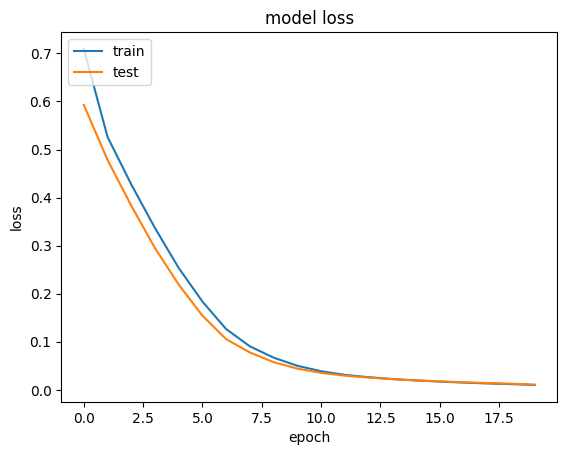

In [14]:
# Iniciando o ANN
classifier = Sequential()

# Criando layers
classifier.add(Dense(6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 13))

classifier.add(Dense(6, kernel_initializer= 'he_uniform',activation='relu'))

classifier.add(Dense(1,kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Compilando
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Ajustando ao training set
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 20)

# listando dados

print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Avaliação do modelo

In [10]:


# Predição
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

# Fazendo a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

# Calculando acurácia
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)

32/32 [==============================] - 0s 1ms/step
